# Regression on graduate admissions dataset (to predict acceptance probability)

Dataset: https://www.kaggle.com/mohansacharya/graduate-admissions Mohan S Acharya, Asfia Armaan, Aneeta S Antony : A Comparison of Regression Models for Prediction of Graduate Admissions, IEEE International Conference on Computational Intelligence in Data Science 2019

Data is CSV file with features in first 8 columns (index col = Serial No.) and label/target in last column (Chance of Admit)

- - - 



### First: read in CSV file as pandas DF, split into design matrix with features, $\mathbf{X}$, and target vector $\mathbf{y}$, and apply scaling to $\mathbf{X}$

Scaled to range [0,1] using ```sklearn.preprocessing.MinMaxScaler```. __If using standard scaler, have to be careful not to apply to features that are classifications or discrete numbers__

<class 'pandas.core.series.Series'> <class 'pandas.core.frame.DataFrame'>


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1365b3850>,
      dtype=object)

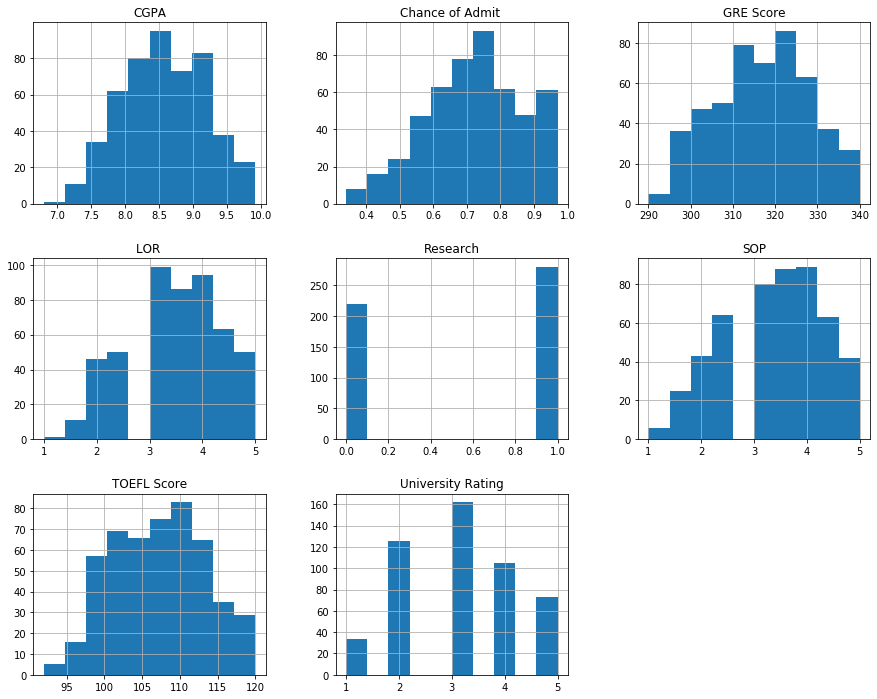

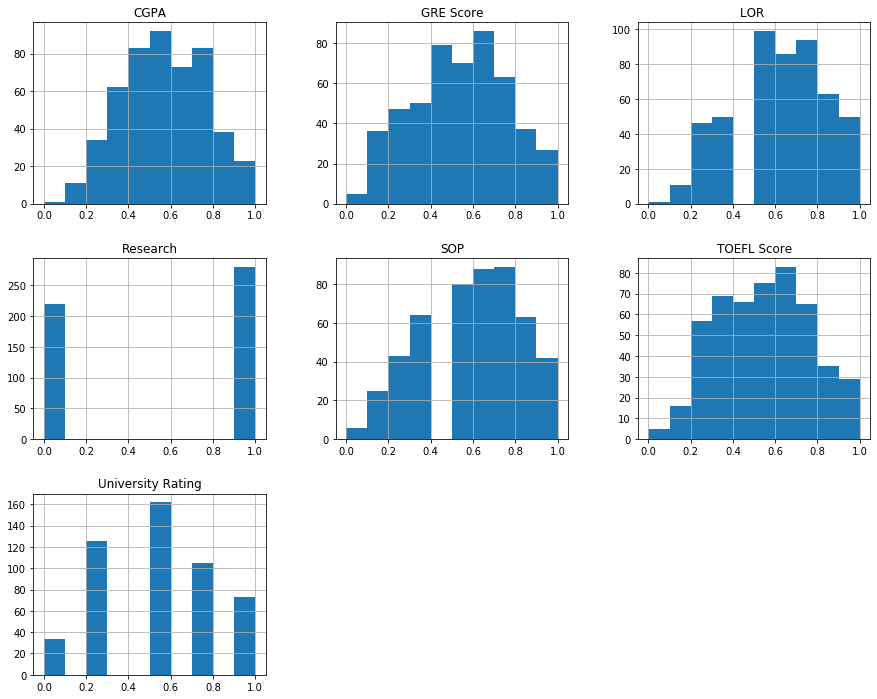

In [374]:
import matplotlib as mpl
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mplimg 
import numpy as np
import os 
import tarfile
import urllib 
import pandas as pd
import seaborn as sns
from glob import glob
from tqdm import tqdm

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,MinMaxScaler
 
# Use pandas to retrieve data file
#url = '' # use to fetch data file each time

# Read in CSV file with probabilities
df = pd.read_csv("Admission_Predict_Ver1.1.csv",index_col='Serial No.')
#print(df.columns)#classprobs.values.astype(np.float32)
#print(df.columns)#df.head()
#print(df)
X=df.drop(columns=['Chance of Admit '])
#print(X.head())
Y=df.loc[:,'Chance of Admit '].copy()
print(type(Y),type(X))
#print(df.index)
mmscaler = MinMaxScaler()
# Define scaler and scale X data
X_scaled = pd.DataFrame( mmscaler.fit_transform(X), index=df.index, columns=X.columns )

#fig1=plt.figure(1,(60,30))
#ax1=plt.subplot(1,2,1)
#ax1=fig1.add_subplot(211)
#plt.subplot(1,2,1)
df.hist(backend='matplotlib',figsize=(15,12))
#ax1.set_title("Raw Data",fontsize=50)
#plt.subplot(1,2,2)
#plt.subplot(1,1,1)
#ax2=plt.subplot(1,2,2)
X_scaled.hist(backend='matplotlib',figsize=(15,12))
#ax2.set_title("Scaled Design Matrix")


In [384]:
print("Unscaled, raw data frame: ")#
df.head()#,'\n\n',X_scaled.head(),'\n',Y.head())

Unscaled, raw data frame: 


,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
Serial No.,,,,,,,,
1,337,118,4,4.5,4.5,9.65,1,0.92
2,324,107,4,4.0,4.5,8.87,1,0.76
3,316,104,3,3.0,3.5,8.00,1,0.72
4,322,110,3,3.5,2.5,8.67,1,0.80
5,314,103,2,2.0,3.0,8.21,0,0.65


In [385]:
print("Scaled design matrix: ")
X_scaled.head()

Scaled design matrix: 


,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
Serial No.,,,,,,,
1,0.94,0.928571,0.75,0.875,0.875,0.913462,1.0
2,0.68,0.535714,0.75,0.750,0.875,0.663462,1.0
3,0.52,0.428571,0.50,0.500,0.625,0.384615,1.0
4,0.64,0.642857,0.50,0.625,0.375,0.599359,1.0
5,0.48,0.392857,0.25,0.250,0.500,0.451923,0.0


In [386]:
print("Target vector")
Y.to_frame().head()

Target vector


,Chance of Admit
Serial No.,
1,0.92
2,0.76
3,0.72
4,0.80
5,0.65


### Split into training and test sets

Use ```sklearn.model_selection.train_test_split``` with shuffling

In [387]:
from sklearn.model_selection import train_test_split

X_train,X_test,Y_train,Y_test = train_test_split(X_scaled,Y,random_state=42,shuffle=True,test_size=0.3)


### Train linear regression algorithm

Simplest: ```sklearn.linear_model.LinearRegression```

In [388]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [389]:
Y_pred = lin_reg.predict(X_test)
Y_pred.shape,X_test.values
#plt.figure(1,(10,8))
##sns.scatterplot(X_test.values, lin_reg.predict(X_test)-Y_test.values)
#plt.show()
#plt.plot(X_train['GRE Score'].values,lin_reg.predict(X_train),'-ro')

((150,),
 array([[0.88      , 0.85714286, 0.75      , ..., 0.625     , 0.87820513,
         1.        ],
        [0.48      , 0.57142857, 0.75      , ..., 0.75      , 0.71794872,
         1.        ],
        [0.5       , 0.46428571, 0.25      , ..., 0.375     , 0.2724359 ,
         0.        ],
        ...,
        [0.68      , 0.75      , 0.75      , ..., 0.75      , 0.63782051,
         0.        ],
        [0.44      , 0.42857143, 0.5       , ..., 0.75      , 0.41346154,
         0.        ],
        [0.44      , 0.5       , 0.5       , ..., 1.        , 0.56730769,
         0.        ]]))

### Make predictions and evaluate algorithm on test set usinng performance measures

Defining predicted target values $\hat{\mathbf{Y}}$ and true values $\mathbf{Y}$, a standard metric is the RMS error (RMSE):  $$\mathrm{RMSE}= \sqrt{ < \left( \hat{\mathbf{Y}} - \mathbf{Y} \right)^2 > }$$


In [390]:
from sklearn.metrics import r2_score

def RMSE(y_true,y_pred):   
    return np.sqrt( np.mean( (y_true - y_pred)**2 ) )

def MSE(y_true,y_pred):
    return np.mean( (y_true - y_pred)**2 )

def plot_learning_curves(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.25, random_state=10)
    train_errors, val_errors = [], []
    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(RMSE(y_train[:m], y_train_predict))
        val_errors.append(RMSE(y_val, y_val_predict))
    plt.figure(1,(15,15))
    plt.plot(train_errors, "r-+", linewidth=2, label="train")
    plt.plot(val_errors, "b-", linewidth=3, label="val")
    plt.legend(loc="upper right", fontsize=14)   # not shown in the book
    plt.xlabel("Training set size", fontsize=14) # not shown
    plt.ylabel("RMSE", fontsize=14)              # not shown


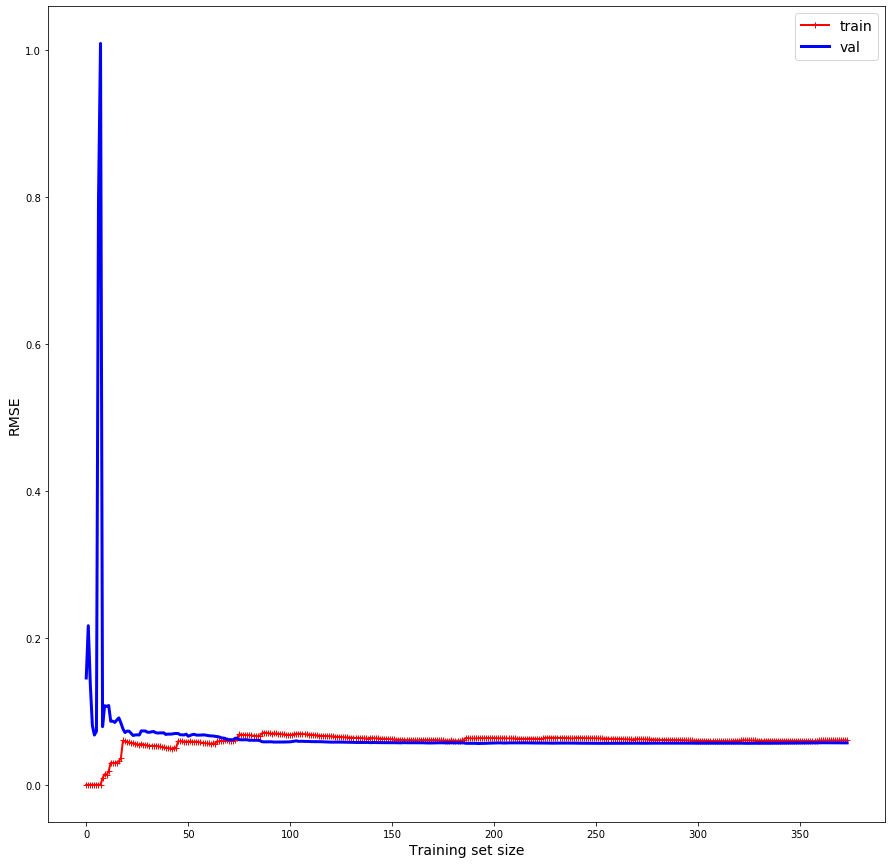

In [391]:
lin_reg = LinearRegression()
plot_learning_curves(lin_reg, X, Y)                        # not shown in the book
#save_fig("underfitting_learning_curves_plot")   # not shown
#plt.show()  

### Try some different algorithms

In [317]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline



model = Pipeline([('poly', PolynomialFeatures(degree=3)),
                  ('linear', LinearRegression(fit_intercept=False))])

#X_train,X_test,Y_train,Y_test = train_test_split(X_scaled,Y,random_state=42,shuffle=True,test_size=0.3)

model.fit(X_train,Y_train)

In [319]:
Y_test_pred = model.predict(X_test)

print("RMSE for poly features: ",RMSE(Y_test,Y_test_pred))

RMSE for poly features:  0.07966472225480942


In [ ]:
model = 
plot_learning_curves(model, X, Y)  